#**IMPORTS📥**


In [ ]:
import random as rnd
from google.colab import drive
from collections import defaultdict
import time
import math
import matplotlib.pyplot as plt
import sys

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


#**CLASSES 📝🐍**

##**CLASSE VERTICE ⚪**

In [ ]:
# Classe Vertice ACHO QUE POSSO APAGAR ALGUNS ATRIBUTOS
class Vertex:
    ''' Estrutura de Vértice para um grafo: encapsula um elemento (vertex_id)
        que é o identificador deste nó.
    '''

    def __init__(self, vertex_id):
        '''O vértice será inserido no Grafo usando o método insert_vertex(x) que cria um Vertex'''
        self._vertex_id = vertex_id   # Id do vértice (elemento a inserir no grafo)
        self.status = None            # Marcação de visitado/não visitado (exercício TP3)
        self._flag = None              #Adiciona uma flag ao vertice

    def __hash__(self):
        '''O valor do elemento é usado como hash para o vértice (o elemento deve ser hashable)'''
        return hash(self._vertex_id)  # devolve o hash do elemento

    def __str__(self):
        '''Devolve a representação do objeto vértice em string.'''
        return'v{0}'.format(self._vertex_id)

    def __eq__(self, vertex):
        return self._vertex_id == vertex._vertex_id # Deve-se garantir que: se hash(vertex)==hash(self), entao vertex==self

    def __lt__(self, vertex):
        return self._vertex_id < vertex._vertex_id

    def __le__(self, vertex):
        return self._vertex_id <= vertex._vertex_id

    def __gt__(self, vertex):
        return self._vertex_id > vertex._vertex_id

    def __ge__(self, vertex):
        return self._vertex_id >= vertex._vertex_id

    def vertex_id(self):
        ''' Devolve o elemento guardado neste vértice.'''
        return self._vertex_id

    def get_flag(self):
      return self._flag

##**CLASSE ARESTA ───**

In [ ]:
class Edge:
    ''' Estrutura de Aresta para um Grafo: (origem, destino) e peso '''

    def __init__(self, vertex_1, vertex_2, weight):
        self._vertex_1 = vertex_1
        self._vertex_2 = vertex_2
        self._weight = weight

    def __hash__(self):
        # Função que mapeia a aresta a uma posição no dicionário (hash map)
        return hash( (self._vertex_1, self._vertex_2) )

    def __str__(self):
        ''' Devolve a representação do objeto aresta em string: (origem, destino)w=peso '''
        return'e({0},{1})w={2}'.format(self._vertex_1, self._vertex_2, self._weight)

    def __eq__(self, other):
        # define igualdade de duas arestas (deve ser consistente com a função hash)
        return self._vertex_1 == other._vertex_1 and self._vertex_2 == other._vertex_2

    def endpoints(self):
        ''' Devolve a tupla (vertex_1, vertex_2) os vértices adjacentes vertex_1 e vertex_2.'''
        return (self._vertex_1, self._vertex_2)

    def cost(self):
        ''' Devolve o peso associado a este arco.'''
        return self._weight

    def opposite(self, vertex):
        ''' Indica o vértice oposto ao vertex nesta aresta
            (apenas se vertex fizer parte da aresta).'''
        if vertex == self._vertex_1:
            return self._vertex_2
        elif vertex == self._vertex_2:
            return self._vertex_1
        else:
            return None

##**CLASSE GRAFO ⚪───⚪**

In [ ]:
class Graph:
    '''
    Representação de um grafo usando dicionários encadeados (nested dictionaries).

    Atributos:
    ----------
    adjancencies: Dicionário externo que associa um vértice (Vertex) a um
                  mapa de adjacências (dicionario interno)
    vertices: Dicionário auxiliar que associa o id dos vértices do grafo
              a um objeto Vertex (tabela de símbolos).
    n: Número de vértices no Grafo
    m: Número de arestas no Grafo

    ----------
'''
    def __init__(self):
        '''Construtor: Cria um grafo vazio (dicionário de _adjancencies).'''
        self._adjancencies = {}  # dicionário que associa o par chave-valor: <Vertex v, Mapa de adjacências de v>
        self._vertices = {}      # dicionário que associa o par: <id do vértice, objeto Vertex correspondente>
        self._n = 0              # número de vértices do grafo
        self._m = 0              # número de arestas do grafo




    def __str__(self):
        '''Devolve a representação do grafo em string (toString)'''
        if self._n == 0:
            ret = "DAA-Graph: <empty>\n"
        else:
            ret = "DAA-Graph:\n"
            for vertex in self._adjancencies.keys():
                #ret += "vertex-"
                ret += str(vertex) + ": "
                for edge in self.incident_edges(vertex.vertex_id()):
                    ret += str(edge) + "; "
                ret += "\n"
        return ret




    def is_directed(self):
        '''A classe Graph representa um grafo não orientado.'''
        return False




    def order(self):
        '''Ordem de um grafo: a quantidade de vértices no Grafo.'''
        return self._n




    def size(self):
        '''Dimensão de um grafo: a quantidade total de arestas do Grafo.'''
        return self._m




    def has_vertex(self, vertex_id):
        '''Verifica se o vértice de id vertex_id está no grafo.'''
        return vertex_id in self._vertices




    def has_edge(self, u_id, v_id):
        '''Verifica se a aresta (u_id, v_id) existe no grafo.'''
        if not self.has_vertex(u_id) or not self.has_vertex(v_id):
            return False
        else:
            vertex_u = self._vertices[u_id]
            vertex_v = self._vertices[v_id]
            return vertex_v in self._adjancencies[vertex_u]




    def insert_vertex(self, vertex_id, vertex_flag = -1):
        '''Insere um novo vértice com o id vertex_id.'''
        if not self.has_vertex(vertex_id):
            vertex = Vertex(vertex_id)
            vertex._flag = vertex_flag
            self._vertices[vertex_id] = vertex  # insere o novo vértice no dicionario de vertices
            self._adjancencies[vertex] = {}     # inicializa o mapa de adjacências deste vértice a vazio
            self._n +=1                         # mais um vértice no grafo




    def insert_edge(self, u_id, v_id, weight=0):
        ''' Cria e insere uma nova aresta entre u_id e v_id com peso weight.
            Se a aresta já existe no grafo, atualiza-se o seu peso.
            Também insere os vértices u_id e v_id, caso não existam.'''
        if not self.has_vertex(u_id):
            self.insert_vertex(u_id) # insere novo vertex e atualiza n
        if not self.has_vertex(v_id):
            self.insert_vertex(v_id) # insere novo vertex e atualiza n
        if not self.has_edge(u_id, v_id):
            self._m +=1           # atualiza m apenas se a aresta ainda não existir no grafo
        #else:
            #print(f"Existing edge {u_id} and {v_id}. Will only update weight")
        vertex_u = self._vertices[u_id]
        vertex_v = self._vertices[v_id]
        e = Edge(vertex_u, vertex_v, weight)
        self._adjancencies[vertex_u][vertex_v] = e  # coloca v nas adjacências de u
        self._adjancencies[vertex_v][vertex_u] = e  # e u nas adjacências de v (para facilitar a procura de todas as arestas incidentes num vértice)




    def incident_edges(self, vertex_id):
        '''Devolve um iterável (gerador) com todas as arestas de um vértice com id vertex_id.'''
        vertex = self._vertices[vertex_id]
        for edge in self._adjancencies[vertex].values(): # para todas as arestas incidentes em v:
            yield edge




    def degree(self, vertex_id):
        '''Quantidade de arestas incidentes no vértice v.
        '''
        return len(list(self.incident_edges(vertex_id)))




    def get_vertex(self, vertex_id):
        ''' Devolve o objeto Vertex associado ao elemento vertex_id no grafo
        '''
        return None if not self.has_vertex(vertex_id) else self._vertices[vertex_id]




    def get_edge(self, u_id, v_id):
        ''' Devolve o objeto aresta (Edge) que liga u_id a v_id.
            Devolve None se não forem adjacentes ou se (um d)os vértices não existirem.'''
        #if u_id not in self._adjancencies or v_id not in self._adjancencies:
        if not self.has_edge(u_id, v_id):
            return None
        else:
            vertex_u = self._vertices[u_id]
            vertex_v = self._vertices[v_id]
            return self._adjancencies[vertex_u][vertex_v]




    def vertices(self):
        '''Devolve um iterável sobre todos os vértices do Grafo (tipo Vertex)'''
        return self._vertices.values() #Value do tipo Vertex, Key do tipo int



    def edges(self):
        '''Devolve um iterável sobre todas as arestas do Grafo (sem arestas duplicadas).'''
        edge_list = []
        for edges_dict in self._adjancencies.values():
            for edge in edges_dict.values():
                if edge not in edge_list:
                  edge_list.append(edge)
        return edge_list




    def remove_vertex(self, vertex_id):
        '''Remove o vértice com id vertex_id. Se o vértice não existir, não faz nada.'''

        if vertex_id in self._vertices.keys():
            # Elimina o vertice do dicinario de vertices
            for adj_vertex in self._adjancencies:
                self.remove_edge(vertex_id, adj_vertex._vertex_id)

                """
                if self.has_edge(vertex_id, adj_vertex._vertex_id):
                    #Remove da lista de adjacencias dentro do dicionário interno a ligação ao vertice removido
                    print("Encontrado vertice com lgação ao vertice removido")
                    del self._adjancencies[adj_vertex][self._vertices.get(vertex_id)]
                    self._m -= 1
                """
            #Remove o vertice do dicionario de adjacencias por completo
            del self._adjancencies[self._vertices.get(vertex_id)]
            #Remove o vertice do dicionario de vertices
            del self._vertices[vertex_id]
            self._n -= 1



    def remove_edge(self, u_id, v_id):
        '''Remove a aresta entre u_id e v_id. Se a aresta não existir, não faz nada.'''
        if  self.has_edge(u_id, v_id):
            vertex_u = self._vertices[u_id]
            vertex_v = self._vertices[v_id]
            del self._adjancencies[vertex_u][vertex_v]
            if vertex_u != vertex_v:  # laços são removidos apenas uma vez
                del self._adjancencies[vertex_v][vertex_u]
            self._m -=1

    def clean_vertex_status(self):
      for vertex in self._vertices.values():
        vertex.status = None

    def has_neighbours(self, vertex):
      '''Verifica se o vértice v possui vértices vizinhos.'''
      return len(self._adjancencies[vertex].keys()) > 0

    def get_neighbours(self, vertex):
      return list(self._adjancencies[vertex].keys())


    def get_vertices(self):
      return self._vertices

    def get_adjancencies(self):
      return self._adjancencies


a)

*   O que são os vértices e as arestas no seu modelo de grafo. Qual foi o critério para esta escolha? Por exemplo, a sua escolha facilita a implementação de alguma operação específica? Ou faz com que as operações fiquem mais eficientes (em relação ao tempo e ao espaço em memória)?

*   A sua representação do problema resulta em que tipo de grafo (não orientado, orientado, pesado, com multiarestas, acíclico, cíclico, bipartido, etc)?

* Que tipo de modificações teve de realizar na classe Graph fornecida (teve de inserir novos atributos/métodos e porquê?); ou como implementou a sua classe Graph?


#**REPRESENTAÇÃO DE DADOS 💾**

##**1.a) Modelo de Grafo**


> Para explicar de que forma foi modelizada a representação do grafo, é necessário descrever de que forma os vértices e as arestas foram definidas, que tipo de grafo resulta desta definição, e que alterações foram feitas às classes disponibilizadas.

> Após analisar os requisitos da API HollywoodOracle, surgiram rapidamente duas ideias  dissemelhantes de representação do grafo. Uma passava por representar os atores como vértices e os filmes como arestas, já a outra era definida de forma contrária. A primeira opção parecia a mais lógica de ambas, já que o principal objetivo seria verificar atores vizinhos para calcular o número de X, ou calcular o caminho entre dois atores. No entanto, dentro de qualquer uma das opções havia algumas questões relevantes.

> A primeira passava pela representação das arestas. De que forma poderia uma aresta representar, em qualquer uma das abordagens, mais do que um filme ou mais do que um ator? Para isso seria necessária cada aresta (*Edge*) guardar uma lista de *Strings*, sendo necessário percorrer essa lista sempre que era preciso encontrar o que conectava dois vértices. Outra opção seria ligar várias arestas entre os mesmos dois vértices, uma solução pouco eficiente e rapidamente descartada. Sendo a quantidade de atores muito superior à de filmes, a ideia de utilizar filmes como vértices foi também descartada, já que essa opção iria gerar uma quantidade elevada de arestas, arestas essas que são computacionalmente caras, comparando com os vértices. Além disso, durante a leitura do ficheiro, seria mais difícil construir o grafo, já que seria necessário verificar o array de cada uma das arestas, para cada um dos atores, à procura de uma semelhança para ligar os dois filmes.

> Apenas restando a ideia de atores como vértices, procurámos ver se seria de facto uma solução eficiente. Sabíamos que para a leitura do ficheiro seria superior, isto, uma vez que, cada linha do ficheiro iria representar por si só um grafo mais pequeno, em que a ligação seria bastante mais fácil já que não teríamos filmes repetidos, não sendo necessário procurar pelas arestas.
Vimos, no entanto, que esta solução teria uma complexidade quadrática na criação do grafo, já que, por cada ator encontrado, seria necessário percorrer ${n - 1}$ atores para os conectar.

> Em busca de uma solução melhor, decidimos implementar um grafo bipartido, em que ambos os conjuntos, filmes e atores, seriam representados por vértices, sendo a ligação feita apenas entre filmes e atores, e nunca entre vértices do mesmo conjunto. A escolha deste tipo de grafo acabou por feita porque, vértices são bastante mais rápidos de aceder, não sendo necessário depender da informação contida nas arestas, e apenas da sua ligação. A implementação seria, no nosso ponto de vista, bastante mais simples, sendo apenas necessário fazer algumas alterações nas classes. O grafo seria mais equilibrando, sendo, num nível computacional, igualmente fácil fazer operações tanto em filmes como em atores, criando uma estrutura mais flexível. Apenas com a desvantagem de ser necessário percorrer os vértices dos filmes para chegar aos atores vizinhos, um mal necessário, mas mesmo assim mais eficiente do que as opções apresentadas anteriormente. Esta implementação facilitaria também as função de *path_to_X()*, ou de procura de filmes, ou atores que estariam representados em arestas.

> Com o modelo de grafo conceptualizado, restava apenas fazer as alterações necessárias às classes para facilitar a implementação.
Na classe do vértice (*Vertex*) foi necessário, de forma a otimizar a identificação dos filmes e atores, adicionar um atributo *_flag*, juntamente com o seu getter, sendo "1" usado para representar um filme, e "0" usado para representar um ator, dando apenas uso ao atributo *status*, e eliminando os restantes para simplificar o código. Outra abordagem estudada para este problema foi criar duas listas para distinguir atores de filmes, acabámos por não o fazer, uma vez que pretendíamos utilizar compreensão de listas em vez de expressões geradores (achámos que qualquer opção seria semelhante em termos de performance). Na classe da aresta (*Edge*), não foi feita qualquer alteração, uma vez que a mesma seria apenas usada para procurar as ligações feitas com o conjunto oposto. Já na classe do grafo (*Graph*), foram feitas algumas adições importantes, tais como, a função *clean_vertex_status()*, usado para dar reset ao atributo *status* de todos os vértices do grafo. O *has_neighbours()*, que devolvia um boolean, verificando de um dado vértice tinha, ou não, vizinhos. *O get_neighbours()* que devolvia um iterável dos vizinhos de um dado vértice. E por fim, um *get_adjancencies()* e *get_vertices()* que devolviam ambos os dicionários do grafo. Foi também feita uma alteração no método *insert_vertex()* de forma a adicionar uma flag nesse instante.
Com esta implementação das classes procurámos ao máximo não limitar a utilidade das mesmas, permitindo, ainda assim, uma boa otimização do principal objetivo. Criando um equilíbrio entre flexibilidade e performance.

> Uma importante alteração que é necessário ter em conta é a alteração feita na base de dados do ficheiro daa_large_dataset.txt (large_dataset_utf.txt). No ficheiro referido havia uma repetição de dois títulos que representavam filmes diferentes. De forma a desenvolver um projeto conciso e realista, a primeira instância desse filme foi alterada para "Inside Out (1997)", de forma a que não haja repetições de títulos. Desta forma o grafo gerado terá mais um vértice a representar esse mesmo filme, e a contagem total dos mesmos será um valor superior ao que é referido no enunciado (285460 vs 285461).

##**1.b) Construção do Grafo através do .txt**

> A implementação desta função auxiliar visa ler o ficheiro .txt com o formato indicando, criando desta forma um grafo bipartido com a estrutura indicada anteriormente. A função, após a sua execução, retorna um objeto do tipo *Graph*.

In [ ]:
#Given a txt file, this funcion creates a Bipartite Graph, on one side the films connected to the actors on the other
def build_bipartitegraph_from_txt(file_name):
  file_graph = Graph()
  i = 0
  with open(f'/content/drive/My Drive/{file_name}.txt', 'r', encoding='utf-8') as fileContent:
    for line in fileContent:
      line_list = line.strip().split("/")
      for l in range(len(line_list)):
        if l == 0:
          file_graph.insert_vertex(line_list[0], 1)
        else:
          file_graph.insert_vertex(line_list[l], 0)
          file_graph.insert_edge(line_list[0], line_list[l])

  return file_graph


# **API HollywoodOracle🔮**

##**2.a) Estrutura de Dados**

> A estrutura de dados a ser utilizada para a implementação da API é, como foi especificado anteriormente, baseada num grafo Bipartido. Esse grafo é construído com base num ficheiro .txt especificado na inicialização da classe, através da chamada da função definida no ponto 1.b).

> Na instanciação de um objeto HollywoodOracle, são criados os seguintes atributos:

> *  "*_every_number_of_X*": Um dicionário, inicialmente vazio (antes da chamada de "*set_center_of_universe()*"), que armazena, para cada ator, a sua distância para o centro do universo atual. Posteriormente utilizado para calcular os caminhos mais curtos entre um ator e o respetivo centro do universo.

> *  "*_center_of_universe*": Uma variável que armazena o centro do universo atual, em formato de String, que corresponde ao mesmo formato armazenado no atributo *_vertex_id* de cada vértice (o nome do ator). Isto é, os nomes dos atores são armazenados no respetivo atributo do vértice, e o vértice que contiver o mesmo *_vertex_id*, será o centro do universo.

> *  "*_bipartitegraph*": Representa o grafo construído através do respetivo ficheiro .txt. É um objeto do tipo *Graph* e representa todas as relações do determinado conjunto fornecido.

> Em relação à análise do espaço de memória utilizado podemos fazer as seguintes deduções com base nos atributos da API:

>> É composta por uma variável (*_center_of_universe*) que armazena uma String. O valor esperado para um objeto do desse tipo corresponde 49 bytes + 1 byte por cada letra. Como a variável representa apenas um String, a sua complexidade espacial será $O(1)$.

>> Apesar de ser mais complexo calcular um valor aproximado da memória ocupada pelo dicionário de *_every_number_of_X*, podemos induzir que a sua complexidade temporal está linearmente relacionada com o número de entradas, sendo a sua complexidade espacial de $O(n),$ diretamente proporcional ao número de entradas.

>>Já em relação ao grafo, podemos reduzir o espaço ocupado pelo mesmo aos seus 4 atributos:


>>  *   Contador do número de vértices (Insignificante, $O(1)$)
>>  *   Contador do número de arestas (Insignificante, $O(1)$)
>>  *   Dicionário com os vértices e os seus respetivos *_vertex_id's*
>>  *   Dicionário com as ligações entre os vértices

>> Relativamente ao dicionário de vértices, sabemos que a complexidade espacial do mesmo será $O(n)$, é importante notar que, como são utilizadas hash tables na implementação interna de dicionários, a memória é alocada em blocos. O mais provável de se observar na chamada do sys.getsizeof() será uma alocação igual ou semelhante nos dicionários dos vértices do grafo, ou dos atores da API. O mesmo acontece uma vez que a função não contabiliza o espaço ocupado pela informação dentro do dicionário, mas apenas pela sua estrutura.

>> Finalmente, podemos fazer também uma análise espacial do dicionário das ligações. Sabemos que o mesmo representa cada vértice, associado com um dicionário interno que contêm os seus vértices vizinhos e as arestas que os conectam. Nesta situação existem duas opções, caso o grafo seja um grafo completo, a complexidade do mesmo será $O(n^2)$, uma vez que cada vértice estará conectado a todos os outros. Outra opção, e mais próxima do cenário implementado, será um grafo esparso. Uma vez que teremos um grafo bipartido, e incompleto em termos de ligações dos conjuntos diferentes, a análise espacial do mesmo será mais próxima de $O(n + a)$, sendo $n$ a quantidade de vértices e $a$ o número de arestas.

##**2.b)**

In [ ]:
class HollywoodOracle:
  def __init__(self, filename):
    self._every_number_of_X = {} #Dict that stores the number of x, of each actor to the center of the universe

    self._center_of_universe = None #Stores the current center of the universe

    self._bipartitegraph = build_bipartitegraph_from_txt(filename) #Create the graph based on a txt file

    self.set_center_of_universe("Bacon, Kevin") #Sets the default center of the universe to Kevin Bacon and calculates _every_number_of_X


  def all_movies(self): #Returns every movie on the graph, used a flag to identify
    movies_list = []
    for vertex in self._bipartitegraph.get_vertices().values():
      if vertex.get_flag() == 1: #Flag 0 for actor and 1 for movie
        movies_list.append(vertex.vertex_id())

    return movies_list


  def all_actors(self): #Returns every actor on the graph, using a similar approach to the all_movies
    actors_list = []
    for vertex in self._bipartitegraph.get_vertices().values():
      if vertex.get_flag() == 0: #Flag 0 for actor and 1 for movie
        actors_list.append(vertex.vertex_id())

    return actors_list


  def movies_from(self, actor): #Returns a list of movies from an actor, looking for the neighbours of that actor's vertex
    movies_list = []
    actor_vertex = self._bipartitegraph.get_vertex(actor)
    if actor_vertex is not None:
       movies_list = [movie.vertex_id() for movie in self._bipartitegraph.get_neighbours(actor_vertex)]

    return movies_list



  def cast_of(self, movie): #Return the cast of a given film by looking for the neighbours of that film's vertex
    actors_list = []
    movie_vertex = self._bipartitegraph.get_vertex(movie)
    if movie_vertex is not None:
       actors_list = [actor.vertex_id() for actor in self._bipartitegraph.get_neighbours(movie_vertex)]
    return actors_list

  def neighbour_actors(self, actor): #Given an actor it return the neighbour actors
    neighbours = []
    for m in self.movies_from(actor):
      for a in self.cast_of(m):
        if a != actor:
          neighbours.append((a,m))

    return neighbours


  def set_center_of_universe(self, actor):
    initial_actor_vertex = self._bipartitegraph.get_vertex(actor)
    if initial_actor_vertex is None:
        raise Exception("Sorry, that actor doesn't exist in the database")

    #Resets the vertices status to look for the number of X again, only if its not the first time
    if self._center_of_universe != None:
      self._bipartitegraph.clean_vertex_status()

    self._center_of_universe = actor

    self._every_number_of_X.clear()
    self._every_number_of_X[self._bipartitegraph.get_vertex(self._center_of_universe)] = 0  # self distance is zero


    actors_to_explore = [initial_actor_vertex]
    i = 1
    while actors_to_explore:
        next_actors_to_explore = []
        for actor_vertex in actors_to_explore:
            if actor_vertex.status is None:  # Means it has not been checked
                actor_vertex.status = 1
                for film_vertex in self._bipartitegraph.get_neighbours(actor_vertex):
                    for actor_from_film in self._bipartitegraph.get_neighbours(
                            film_vertex):  # Iterate over actors from the film
                        if actor_from_film.status is None and actor_from_film not in self._every_number_of_X: #
                            next_actors_to_explore.append(actor_from_film)
                            self._every_number_of_X[actor_from_film] = i
        actors_to_explore = next_actors_to_explore
        i += 1


  def number_of_X(self, actor):
    return self._every_number_of_X[self._bipartitegraph.get_vertex(actor)]

  def min_X_neighbours(self, actor):
    neighbours = self.neighbour_actors(actor)
    if len(neighbours) > 0:
      min_X = min([self.number_of_X(actor) for actor,movie in neighbours])
      return [(actor,movie) for actor,movie in neighbours if self.number_of_X(actor) == min_X]

  def path_to_X(self, actor, x=None, path=None, all_paths=None):
    if path is None: #This disallows for repeated results and the function is called more then once
        path = []
    if all_paths is None:
        all_paths = []
    path = path + [(actor, None)]  # Add the initial actor to the path
    if actor == self._center_of_universe:
        all_paths.append(path)
        return all_paths

    next_actors = self.min_X_neighbours(actor)
    if next_actors is not None:  # Add verification here
        for next_actor, movie in next_actors:
            new_path = path.copy() + [(next_actor, movie)]  # Create a copy of path
            all_paths = self.path_to_X(next_actor, x, new_path, all_paths)

            if x is not None and len(all_paths) == x: #Stops the recursion on a certain limit given by x
                break

    return all_paths[:x] if x is not None else all_paths

  def print_paths(self, paths):
    if not paths:
        print("No paths found.")
        return

    print("Paths:")
    for i, path in enumerate(paths, start=1):
        print(f"Path {i}: ", end="")
        for j, (actor, movie) in enumerate(path):
            if j == 0:
                print(f"Actor: {actor}", end="")
            elif movie is not None:
                print(f" -> In Movie: {movie} with Actor: {actor}", end="")
            else: pass
                #print(f" -> In Movie: {movie} with", end="")
        print("\n")


  def max_number_of_X(self):
    return max(self._every_number_of_X.values())

  def count_number_of_X(self, n):
    count_actors = 0
    for actor, number in self._every_number_of_X.items():
      if number == n:
        count_actors += 1
    return count_actors


  def average_number_of_X(self):
    return sum(self._every_number_of_X.values())/len(self._every_number_of_X)

  def get_center_of_universe(self):
    return self._center_of_universe


###**Apresentação dos Testes na Base de Dados "daa_small_dataset" (daa_small_utf8.txt)**

Foram utilizados os atores "Bacon, Kevin" e "Depp, Johnny", e também o filme "Zoolander (2001)" como referência para as funções

In [ ]:
game = HollywoodOracle("daa_small_dataset") #Cria a instância com o dataset indicado

In [ ]:
print(len(game.all_movies())) #Print da quantidade de filmes

4527


In [ ]:
print(len(game.all_actors()))#Print da quantidade de atores

122406


In [ ]:
print(game.movies_from("Bacon, Kevin")) #Print dos filmes de "Bacon, Kevin"

['Animal House (1978)', 'Apollo 13 (1995)', 'Beauty Shop (2005)', 'Diner (1982)', 'Few Good Men, A (1992)', 'Flatliners (1990)', 'Footloose (1984)', 'Friday the 13th (1980)', 'He Said, She Said (1991)', 'Hollow Man (2000)', 'In the Cut (2003)', 'JFK (1991)', 'Murder in the First (1995)', 'My Dog Skip (2000)', 'Mystic River (2003)', 'Novocaine (2001)', 'Picture Perfect (1997)', 'Planes, Trains & Automobiles (1987)', 'River Wild, The (1994)', "She's Having a Baby (1988)", 'Sleepers (1996)', 'Stir of Echoes (1999)', 'Trapped (2002)', 'Tremors (1990)', 'Where the Truth Lies (2005)', 'Wild Things (1998)', 'Woodsman, The (2004)']


In [ ]:
print(game.cast_of("Zoolander (2001)")) #Print dos atores de "Zoolander (2001)"

['Vaughn, Vince', 'Thurman, Dechen', 'Odadjian, Shavo', 'Crown, Taj', 'Lagerfeld, Karl', 'Lieberz, Herb', 'Chatwal, Vikram', 'Kum, Ming Ho', 'Slavin, Randall (I)', 'Bass, Lance', 'Wilson, Andrew (III)', 'Winzenried, Eric', 'Kmetko, Steve', 'K-Roc', 'Elsokari, Tarek', 'Rich, Richie (I)', 'McAlpin, Michael', 'Fabio (I)', 'Dick, Andy (I)', 'Godfrey', 'Manning, Alexandre', 'Vargas, John (I)', 'Hart, Taylor Gerard', 'Word, Scotty F.', 'Hilfiger, Tommy', 'Levin, Matt (I)', 'Highsmith, Asio', 'McNish, Colin', 'Kravitz, Lenny', 'Richardson, Shabazz', 'Stiller, Jerry', 'Johnson, Eliot', 'Kanal, Tony', 'Aucoin, Kevyn', 'Shandling, Garry', 'Chu, Stan', 'Rossdale, Gavin', 'Friedlander, Judah', 'Beckford, Tyson', 'Webb, Mason', 'Commeret, Luc', 'Creek, Luther', 'Duchovny, David', '11:11, Angel', 'Pipino, Ric', 'Stanley, Richard (IX)', 'Max, Kenny', 'Zane, Billy', 'Winston, Mitch', 'Maximus, Flattus', 'Gladys, Richard', 'Ford, Tom (VIII)', 'D, Stevie (I)', 'Quine, Rohan', 'Bor, Lam', 'Van Atta, Jeff

In [ ]:
game.set_center_of_universe("Depp, Johnny") #Teste do set_center_of_universe
print(game._center_of_universe) #Print no novo centro do universo

game.set_center_of_universe("Bacon, Kevin") #Mudança para o ator de referência novamente

Depp, Johnny


In [ ]:
self_distance = game.number_of_X("Bacon, Kevin")
other_distance = game.number_of_X("Depp, Johnny")
print(f"A distância do centro do universo a si próprio: {self_distance}") #Distância ao próprio ator: 0
print(f"A distância do centro do universo ao 'Depp, Johnny': {other_distance}") #Distância a um outro ator: X

A distância do centro do universo a si próprio: 0
A distância do centro do universo ao 'Depp, Johnny': 2


In [ ]:
game.print_paths(game.path_to_X("Depp, Johnny")) #Print de TODOS os caminhos do mesmo tamanho até ao centro do universo

Paths:
Path 1: Actor: Depp, Johnny -> In Movie: Arizona Dream (1993) with Actor: Taylor, Lili (I) -> In Movie: She's Having a Baby (1988) with Actor: Bacon, Kevin

Path 2: Actor: Depp, Johnny -> In Movie: Arizona Dream (1993) with Actor: Noonan, Polly -> In Movie: Novocaine (2001) with Actor: Bacon, Kevin

Path 3: Actor: Depp, Johnny -> In Movie: Astronaut's Wife, The (1999) with Actor: Grubbs, Gary -> In Movie: JFK (1991) with Actor: Bacon, Kevin

Path 4: Actor: Depp, Johnny -> In Movie: Astronaut's Wife, The (1999) with Actor: Bachmann, Conrad -> In Movie: Tremors (1990) with Actor: Bacon, Kevin

Path 5: Actor: Depp, Johnny -> In Movie: Astronaut's Wife, The (1999) with Actor: Theron, Charlize -> In Movie: Trapped (2002) with Actor: Bacon, Kevin

Path 6: Actor: Depp, Johnny -> In Movie: Before Night Falls (2000) with Actor: Castro, Fidel (I) -> In Movie: JFK (1991) with Actor: Bacon, Kevin

Path 7: Actor: Depp, Johnny -> In Movie: Before Night Falls (2000) with Actor: Penn, Sean (I) 

In [ ]:
max_number_of_paths = 5
paths = game.path_to_X("Depp, Johnny", max_number_of_paths)
game.print_paths(paths) #Print de um número especifico de caminhos, neste caso 5 mas poderia ser qqr valor

Paths:
Path 1: Actor: Depp, Johnny -> In Movie: Arizona Dream (1993) with Actor: Taylor, Lili (I) -> In Movie: She's Having a Baby (1988) with Actor: Bacon, Kevin

Path 2: Actor: Depp, Johnny -> In Movie: Arizona Dream (1993) with Actor: Noonan, Polly -> In Movie: Novocaine (2001) with Actor: Bacon, Kevin

Path 3: Actor: Depp, Johnny -> In Movie: Astronaut's Wife, The (1999) with Actor: Grubbs, Gary -> In Movie: JFK (1991) with Actor: Bacon, Kevin

Path 4: Actor: Depp, Johnny -> In Movie: Astronaut's Wife, The (1999) with Actor: Bachmann, Conrad -> In Movie: Tremors (1990) with Actor: Bacon, Kevin

Path 5: Actor: Depp, Johnny -> In Movie: Astronaut's Wife, The (1999) with Actor: Theron, Charlize -> In Movie: Trapped (2002) with Actor: Bacon, Kevin



In [ ]:
print(game.max_number_of_X()) #Print da maior distância entre um ator o centro do universo

6


In [ ]:
print(game.count_number_of_X(3)) #Print da quantidade de atores à distância de n (3) do centro do universo

44143


In [ ]:
print(game.average_number_of_X()) #Print do número médio de X para o centro do universo

2.388606098422029


###**Análise Empírica da Memória Utilizada**


In [ ]:
sys.getsizeof(game._center_of_universe) #49 bytes base + 12 bytes de letras para "Bacon, Kevin"

61

In [ ]:
sys.getsizeof(game._every_number_of_X) #Tamanho médio do dicionário com o número de atores que têm ligação ao centro do universo, quase 122000

5242968

In [ ]:
sys.getsizeof(game._bipartitegraph._vertices) #Tamanho médio do dicionário com o número de vértices +-127000

5242968

Podemos observar que a memória ocupada a ambas as estruturas dos dicionários é igual, apesar do valor real ser bastante diferente. Tal se deve ao facto de um dicionário representar nomes dos atores (*String*) associadas ao seu número de X (*Int*), e outro representar nomes de vértices (*String*) e o objeto em si (*Vertex*).

In [ ]:
sys.getsizeof(game._bipartitegraph._adjancencies) #Memória igual uma vez que o número de entradas do dicionário externo é também +-127000

5242968

In [ ]:
main_dict = game._bipartitegraph._adjancencies.values()
inner_dict_list = [d.copy() for d in main_dict]
total_size = sum(sys.getsizeof(d) for d in inner_dict_list)
individual_size = sys.getsizeof(inner_dict_list[0])
print(f"A memória total ocupada pela estutura dos dicionários internos é: {total_size}")
print(f"A memória total ocupada pela estutura de um dicionário interno é: {individual_size}")


A memória total ocupada pela estutura dos dicionários internos é: 38208304
A memória total ocupada pela estutura de um dicionário interno é: 1176


Nesta situação, podemos ver que o valor total da estrutura dos dicionários internos é bastante superior ao valor da estrutura dos restantes dicionários. No entanto, o valor individual de cada dicionário interno é bastante inferior.

In [ ]:
#Criar um dicionário com metade do tamanho para comparação da memória ocupada pela estrutura
smaller_dict = {}
for i in range((len(game._every_number_of_X) // 2)):
  smaller_dict[i] = 0

print(sys.getsizeof(smaller_dict))

2621536


Com esta última observação podemos concluir que a nossa indução da complexidade espacial do dicionário estava também correta. Para um dicionário com $n$ elementos, a sua estrutura irá ocupar $b$ bytes. Caso o tamanho do dicionário seja $n/2$, o espaço ocupado pelo mesmo será também $b/2$ bytes. Concluindo assim que a sua complexidade é linear.

Para calcular o valor real ocupado pela nossa classe, poderíamos assumir um valor médio por linha em cada um dos dicionários e somar ao valor ocupado pela sua estrutura.

> *_every_number_of_X*: Assumindo um valor médio de 90 bytes (*String* + *Int*) por linha, teríamos $5242968 + ( 90 * 122000 ) \simeq 16223000, 16MB$

> *_bipartitegraph._veretices*: Assumindo um valor médio de 250 bytes (200 bytes pelo objeto *Vertex* + 50 pela *String*) por linha, chegamos a $5242968 + ( 250 * 127000 ) \simeq 37000000, 37MB$

> *_bipartitegraph._adjancencies*: Por linha, considerando cerca de 25 ligações por cada um dos vértices, teríamos 200 bytes do *Vertex* + 200 bytes do *Edge*, vezes o numero médio de ligações (25), somado com os 1176 bytes ocupados pela estrutura interna juntamente com mais 200 bytes para o valor do *Vertex* que representa a chave da linha, ou seja, por linha: $(200 + 200) * 25 + 1176 + 200 \simeq 11376$ bytes por linha.
Sendo cada linha um vértice, teríamos em média $(11376 * 127000) + 5242968 \simeq 149718200, 150MB$ bytes no total.

> Assumindo que os valores ocupados pelas classes estão corretos, poderemos considerar que uma instância de *HollywoodOracle* com o ficherio small_dataset_utf8.txt irá ocupar, em média, $203MB$.

É importante relembrar que este valor se trata apenas de uma aproximação ao valor real, a forma mais precisa de o fazer seria apenas verificar o consumo real de memória ao executar o projeto.

#**Testes 👨‍🔬**

##**3.1) Histograma número de atores para Kevin Bacon**

In [ ]:
#Function that creates an histogram of the number of actors to the default center of universe for a given database
def create_histogram_kevin_bacon(filename):
  graphAPI = HollywoodOracle(filename)
  max_distance = graphAPI.max_number_of_X()
  list_of_distances = [graphAPI.count_number_of_X(i) for i in range(max_distance + 1)]

  plt.bar(range(max_distance + 1), list_of_distances, color='darkblue', edgecolor='black')
  plt.xlabel('Distance to X')
  plt.ylabel('Number of Actors')

  plt.show()

  [print(f"A uma distância de {i} existem {x} ator/es") for i, x in enumerate(list_of_distances)]
  print(f"O número médio de X é: {graphAPI.average_number_of_X()}")

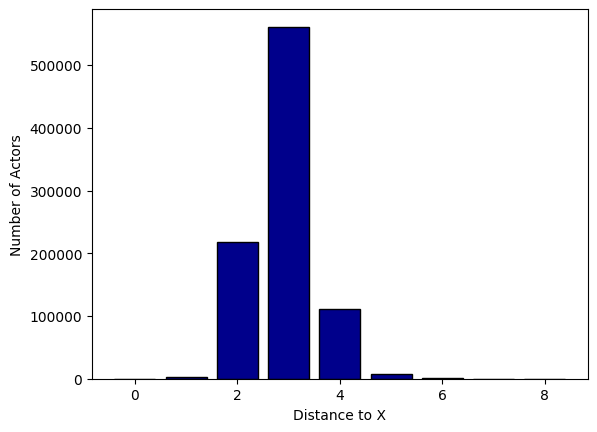

A uma distância de 0 existem 1 ator/es
A uma distância de 1 existem 2249 ator/es
A uma distância de 2 existem 218085 ator/es
A uma distância de 3 existem 561132 ator/es
A uma distância de 4 existem 111180 ator/es
A uma distância de 5 existem 7906 ator/es
A uma distância de 6 existem 903 ator/es
A uma distância de 7 existem 100 ator/es
A uma distância de 8 existem 14 ator/es
O número médio de X é: 2.8974954801069246


In [ ]:
create_histogram_kevin_bacon("daa_large_dataset")

##**3.2) Histograma da distância média de X dos 20 atores mais populares de Hollywood**

In [ ]:
#Function that returns the top 20 actors from the csv file
def get_actors_csv(filename):
  top_actors = [] #List of the actors
  with open(f'/content/drive/My Drive/{filename}.csv', 'r') as file:
      for line in file:
        columns = line.strip()
        top_actors.append(columns.split(";")[1])

  return top_actors

In [ ]:
#Function that returns the average number of X for each actor on a given lsit
def calculate_every_average_X_of_list(actors_list, filename):
  top_actors_average_X = {} #Dict that has the average number of X for each actor, <actor's name><actors average number of X>
  oracle = HollywoodOracle(filename)
  for actor in actors_list:
    oracle.set_center_of_universe(actor)
    top_actors_average_X[actor] = oracle.average_number_of_X()

  return top_actors_average_X


In [ ]:
#Given a dict, this function build a bar plot graph with the keys being the x-axis and the values represented by the y-axis
def build_bar_plot_with_dict(actors_dict): #<actor's name><average number of X>

  plt.bar(actors_dict.keys(), actors_dict.values(), color='darkblue', edgecolor='black')
  plt.xlabel("Actor's name")
  plt.ylabel("Number of X")

  plt.xticks(rotation=90, fontsize=8)

  plt.tight_layout()

  plt.show()

  [print(f"O ator {key} tem um numero médio de X de: {value}") for key, value in actors_dict.items()]

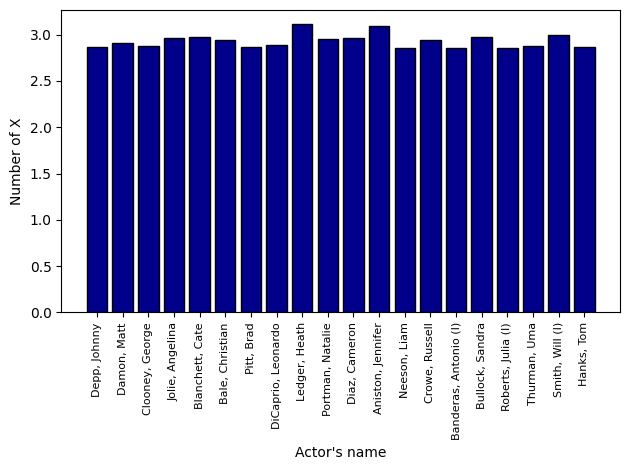

O ator Depp, Johnny tem um numero médio de X de: 2.871358851780782
O ator Damon, Matt tem um numero médio de X de: 2.907931719112215
O ator Clooney, George tem um numero médio de X de: 2.877270761005801
O ator Jolie, Angelina tem um numero médio de X de: 2.962805993988265
O ator Blanchett, Cate tem um numero médio de X de: 2.9758166309881653
O ator Bale, Christian tem um numero médio de X de: 2.9393857382122297
O ator Pitt, Brad tem um numero médio de X de: 2.869159355346784
O ator DiCaprio, Leonardo tem um numero médio de X de: 2.8920117129008287
O ator Ledger, Heath tem um numero médio de X de: 3.1100114245150126
O ator Portman, Natalie tem um numero médio de X de: 2.949464822476347
O ator Diaz, Cameron tem um numero médio de X de: 2.9592200272857347
O ator Aniston, Jennifer tem um numero médio de X de: 3.0929656044455784
O ator Neeson, Liam tem um numero médio de X de: 2.8505739986911722
O ator Crowe, Russell tem um numero médio de X de: 2.9393180784631254
O ator Banderas, Antonio (

In [ ]:
top_actors = get_actors_csv("top20imbd")
actor_dict = calculate_every_average_X_of_list(top_actors,  "daa_large_dataset")
build_bar_plot_with_dict(actor_dict)

##**3.3) Gráfico do número médio de X para 1000 atores aleatórios**

Como não foi especificado o estilo do gráfico para esta questão, tomámos a liberdade de representar os valores através de um  gráfico de linha. Este estilo permite analisar melhor a quantidade de *outliers* e retirar as conclusões necessárias.

In [ ]:
#Appends in a file the average number of X of 1000 random actors, allows to access the file and print the plot without calculating again
def write_1000_number_of_X(filename):
  oracle = HollywoodOracle("daa_small_dataset")
  actors_list = oracle.all_actors()
  actors_distance_to_X = {}
  with open(f'/content/drive/My Drive/{filename}.txt', 'a') as file:
    for i in range(1000):
      actor = rnd.choice(actors_list)
      oracle.set_center_of_universe(actor)
      actors_distance_to_X[actor] = oracle.average_number_of_X()
      file.write(f"O ator {actor}; tem um numero médio de X de: {actors_distance_to_X[actor]} \n")


In [ ]:
#Write the values on a file
write_1000_number_of_X("actors_number_of_X")

In [ ]:
#From the actors and average values saved on the file, it retreives them and builds a dict
def get_dict_from_file(filename):
  actor_dict = {}
  with open(f'/content/drive/My Drive/{filename}.txt', 'r') as file:
    i = 0
    for line in file:
      line = line.split(" ", 2)[2]
      actor = line.split(";")[0]
      value = line.split(":")[1].strip()
      actor_dict[actor] = float(value)
      i += 1
  #build_line_plot_with_dict(actor_dict)
  return actor_dict

In [ ]:
#Given a dict this function build a line plot with x being the keys and y being the values
def build_line_plot_with_dict(actors_dict):

    plt.plot(actors_dict.keys(), actors_dict.values(), color='darkblue')

    plt.xlabel("Actors")
    plt.ylabel("Number of X")

    x_ticks_indices = [idx for idx in range(len(actors_dict.keys())) if idx % 200 == 0]
    plt.xticks(x_ticks_indices, [idx for idx in x_ticks_indices])
    plt.tight_layout()
    plt.show()

    [print(f"O ator {key} tem um numero médio de X de: {value}") for key, value in actors_dict.items()]


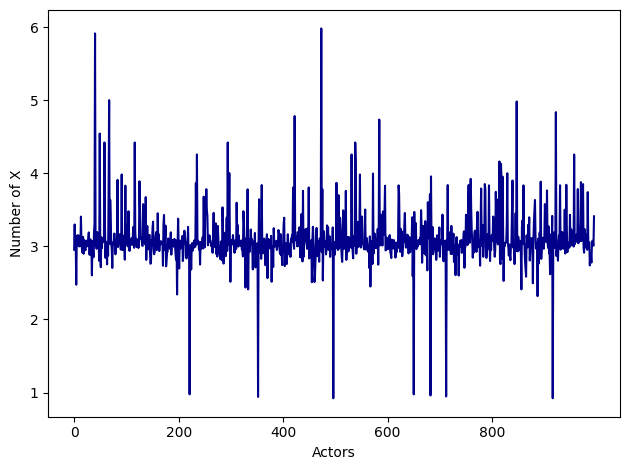

O ator Mordente, Tony tem um numero médio de X de: 2.9552716704159208
O ator Briffa, Joseph tem um numero médio de X de: 3.299108389024811
O ator Boyle, Sally (I) tem um numero médio de X de: 2.9504852137074926
O ator Papineau, Alice tem um numero médio de X de: 3.0640137271965977
O ator Lawrence, Marc (I) tem um numero médio de X de: 2.4760184561829854
O ator Kusch, Dale tem um numero médio de X de: 3.0963038373754124
O ator Cui, Xinmin tem um numero médio de X de: 3.1488727607100047
O ator Housman, Jason tem um numero médio de X de: 3.0667640925436364
O ator Downes, Kyle tem um numero médio de X de: 3.1516313361028554
O ator Ryder, Rob tem um numero médio de X de: 3.0022741826899395
O ator Freeman, Issac tem um numero médio de X de: 2.9996305479384575
O ator Shue, Tony tem um numero médio de X de: 3.036107781481421
O ator Dunn, Kirk tem um numero médio de X de: 3.0039079818065386
O ator Davidson, Holly (I) tem um numero médio de X de: 3.4067831398499204
O ator Halsey, Darcy tem um nu

In [ ]:
actor_dict = get_dict_from_file("actors_number_of_X")
build_line_plot_with_dict(actor_dict)

# **QUESTÕES ÉTICAS** ⚖️


## a) Colaboração no projeto

Para a realização do trabalho foi debatido com o Rodrigo Leitão, do Grupo 10 o problema encontrado na base de dados do "large_dataset_utf8". A única partilha que foi feita foi o resultado da função "path_to_X()" para que conseguíssemos identificar o filme repetido.
Não foi partilhada qualquer resposta ou qualquer implementação do projeto.

## b) Fontes



Para além do material disponibilizado na U.C., foram também utilizadas algumas páginas de referências à linguagem, e alguns fóruns para estudo de qual o melhor modelo e estrutura de implementação a seguir.

*   https://docs.python.org/3/reference/index.html
*   https://stackoverflow.com/questions/2776829/difference-between-pythons-generators-and-iterators
* https://www.geeksforgeeks.org/how-to-find-size-of-an-object-in-python/



Autores:

Francisco Brito, nº 111445

Guilherme Penedo, nª 111222